c:\Users\Ashutosh\Downloads\Deep Learnig 6_8 PM Thu Fri\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ashutosh\Downloads\Deep Learnig 6_8 PM Thu Fri\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ashutosh\Downloads\Deep Learnig 6_8 PM Thu Fri\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


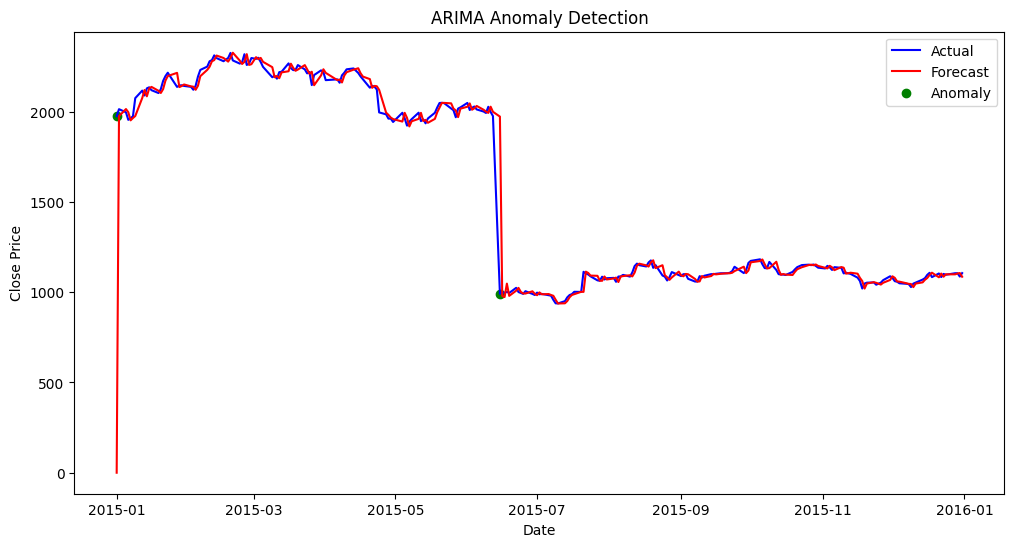

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('infy_stock_data.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as index
data.set_index('Date', inplace=True)

# Fit ARIMA model
p = 5  # AR order
d = 1  # Differencing order
q = 0  # MA order
model = ARIMA(data['Close'], order=(p, d, q))
fit_model = model.fit()

# Forecast
forecast = fit_model.predict(start=0, end=len(data)-1)

# Calculate residuals
residuals = data['Close'] - forecast

# Calculate mean and standard deviation of residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

# Define threshold for anomaly detection
threshold = 3 * residual_std  # Adjust according to your data and requirements

# Detect anomalies
anomalies = np.abs(residuals) > threshold

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual', color='blue')
plt.plot(data.index, forecast, label='Forecast', color='red')
plt.scatter(data.index[anomalies], data.loc[anomalies, 'Close'], color='green', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Anomaly Detection')
plt.legend()
plt.show()



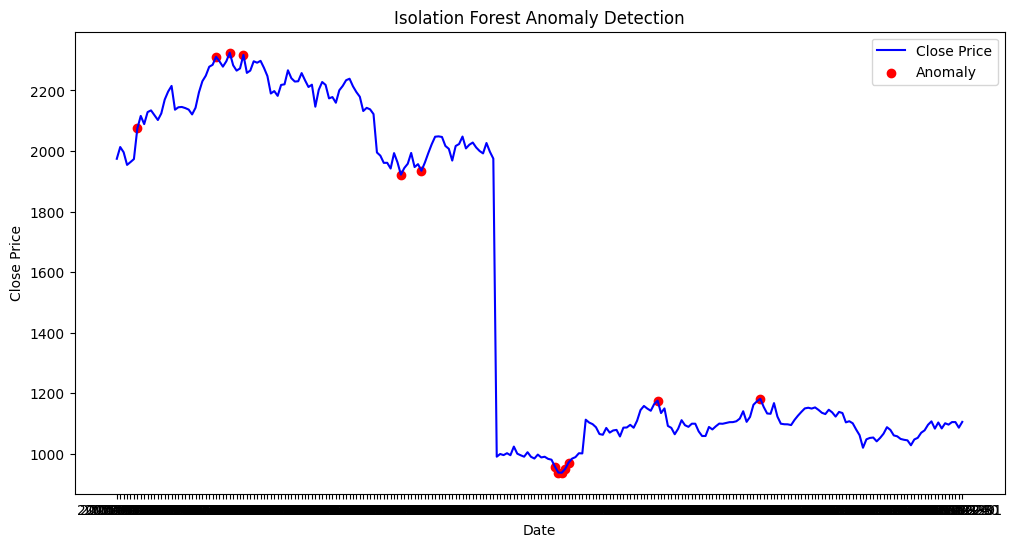

In [22]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('infy_stock_data.csv')

# Assuming 'Date' is in datetime format and 'Close' column exists

# Prepare data for Isolation Forest
X = data[['Close']].values

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on expected outlier proportion
isolation_forest.fit(X)

# Predict outliers
outliers = isolation_forest.predict(X)

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.scatter(data.loc[outliers == -1, 'Date'], data.loc[outliers == -1, 'Close'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()


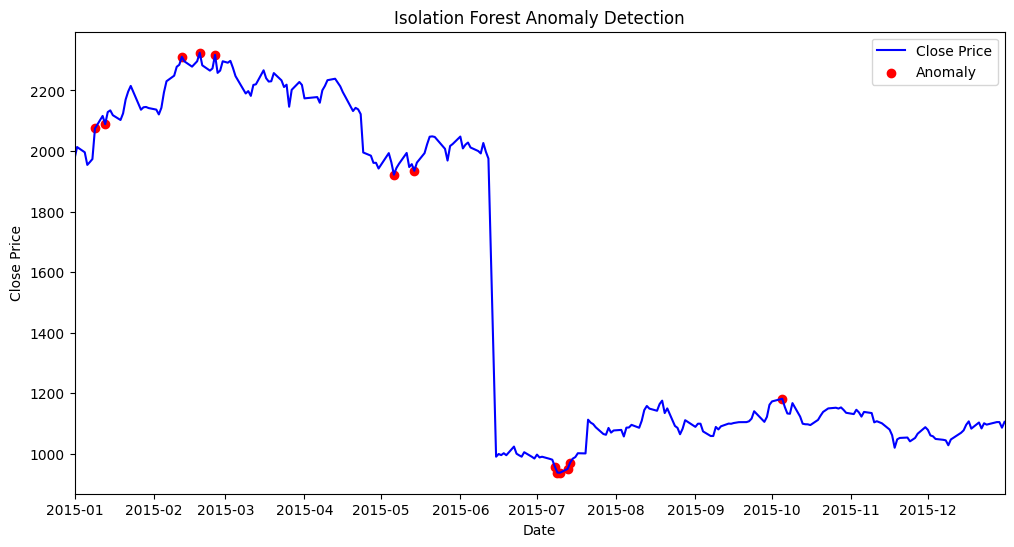

In [20]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('infy_stock_data.csv')

# Assuming 'Date' is in datetime format and 'Close' column exists
data['Date'] = pd.to_datetime(data['Date'])

# Prepare data for Isolation Forest
X = data[['Close']].values

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on expected outlier proportion
isolation_forest.fit(X)

# Predict outliers
outliers = isolation_forest.predict(X)


# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.scatter(data.loc[outliers == -1, 'Date'], data.loc[outliers == -1, 'Close'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Isolation Forest Anomaly Detection')

# Set date range for x-axis
plt.xlim(data['Date'].iloc[0], data['Date'].iloc[-1])

plt.legend()
plt.show()
